In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

DYSKRETYZACJA

zadanie 1 i 2

In [309]:
def dyskretyzacja(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2 * np.pi * f * t)

    return t, s

zadanie 3

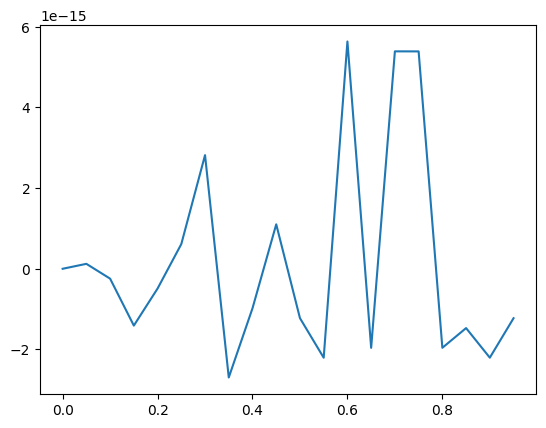

In [310]:
x, y = dyskretyzacja(10, 20)
plt.plot(x, y);

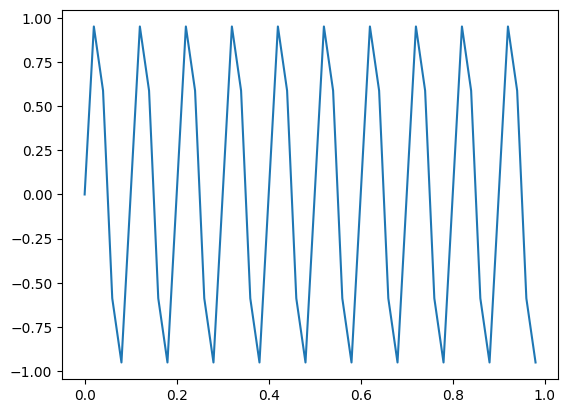

In [311]:
x, y = dyskretyzacja(10, 50)
plt.plot(x, y);

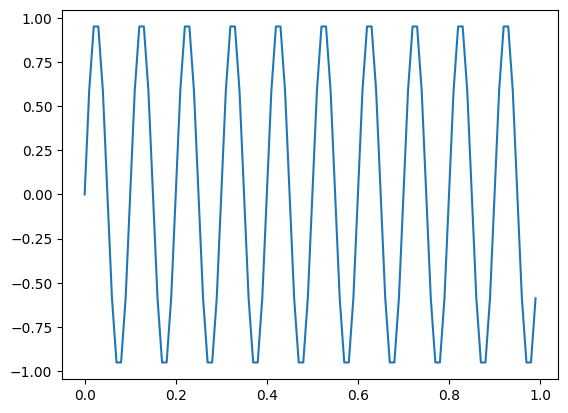

In [312]:
x, y = dyskretyzacja(10, 100)
plt.plot(x, y);

zadanie 4

Twierdzenie Nyquista–Shannona - częstotliwość próbkowania powinna być co najmniej dwa razy większa od maksymalnej częstotliwości sygnału. Dzięki temu twierdzeniu możliwa jest zamiana sygnału ciągłego na sygnał dyskretny

zadanie 5

Zjawisko aliasingu - gdy sygnał zostanie spróbkowany z częstotliwością mniejszą niż dwukrotność maksymalnej częstotliwości sygnału zostaje on nieodwracalnie zniekształcony

zadanie 6

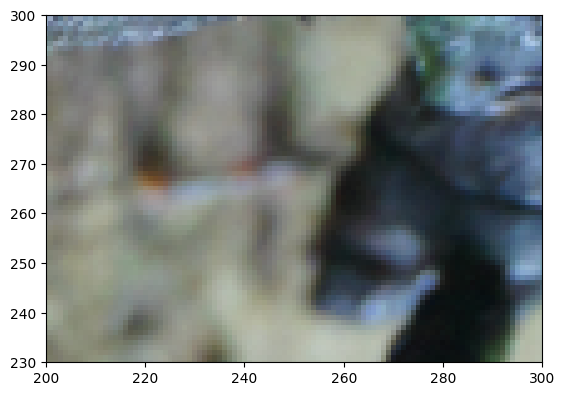

In [313]:
image = plt.imread('./robal.png')
plt.xlim(200, 300)
plt.ylim(230, 300)
plt.imshow(image);

KWANTYZACJA

zadanie 2

In [314]:
print(f"Liczba wymiarów wczytanej macierzy: {image.ndim}")

Liczba wymiarów wczytanej macierzy: 3


zadanie 3

In [315]:
print(f"Najgłębszy wymiar składa się z {len(image[0][0])} wartości")

Najgłębszy wymiar składa się z 3 wartości


zadanie 4

In [316]:
R = image[ :, :, 0]
G = image[ :, :, 1]
B = image[ :, :, 2]

wyznaczenie jasności piksela

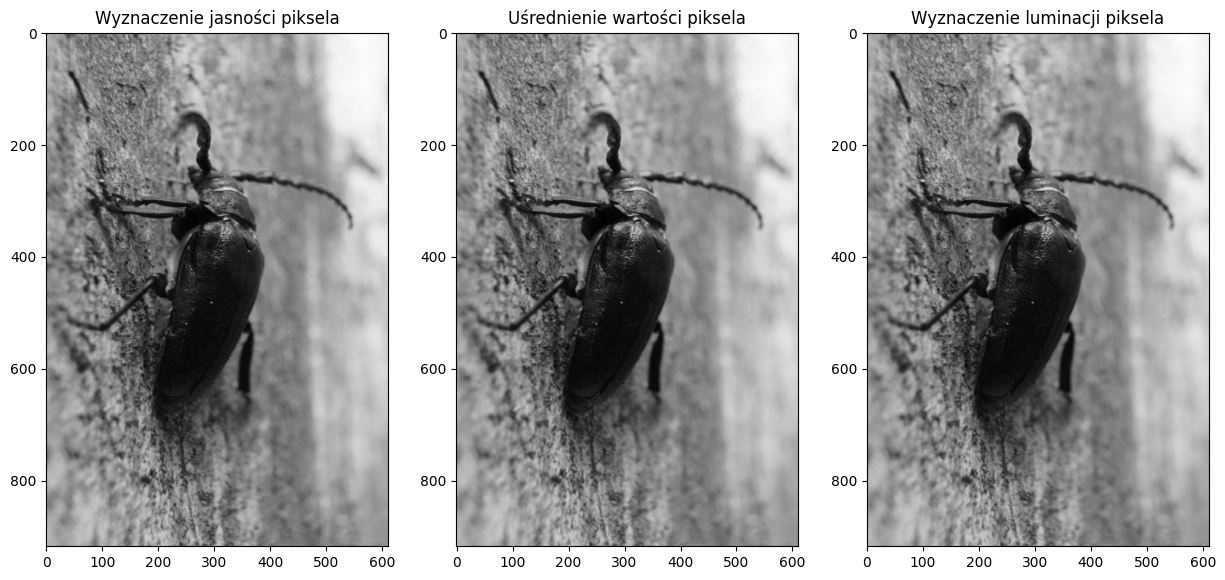

In [317]:
szarosc1 = (np.maximum(R, B, G) + np.minimum(R, B, G)) / 2
szarosc2 = (R + G + B) / 3
szarosc3 = 0.21 * R + 0.72 * G + 0.07 * B

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].set_title("Wyznaczenie jasności piksela")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

# axs[0].imshow(szarosc1, cmap=plt.get_cmap('gray'))
# axs[1].imshow(szarosc2, cmap=plt.get_cmap('gray'))
# axs[2].imshow(szarosc3, cmap=plt.get_cmap('gray'));

axs[0].imshow(szarosc1, cmap='gray')
axs[1].imshow(szarosc2, cmap='gray')
axs[2].imshow(szarosc3, cmap='gray');


zadanie 5

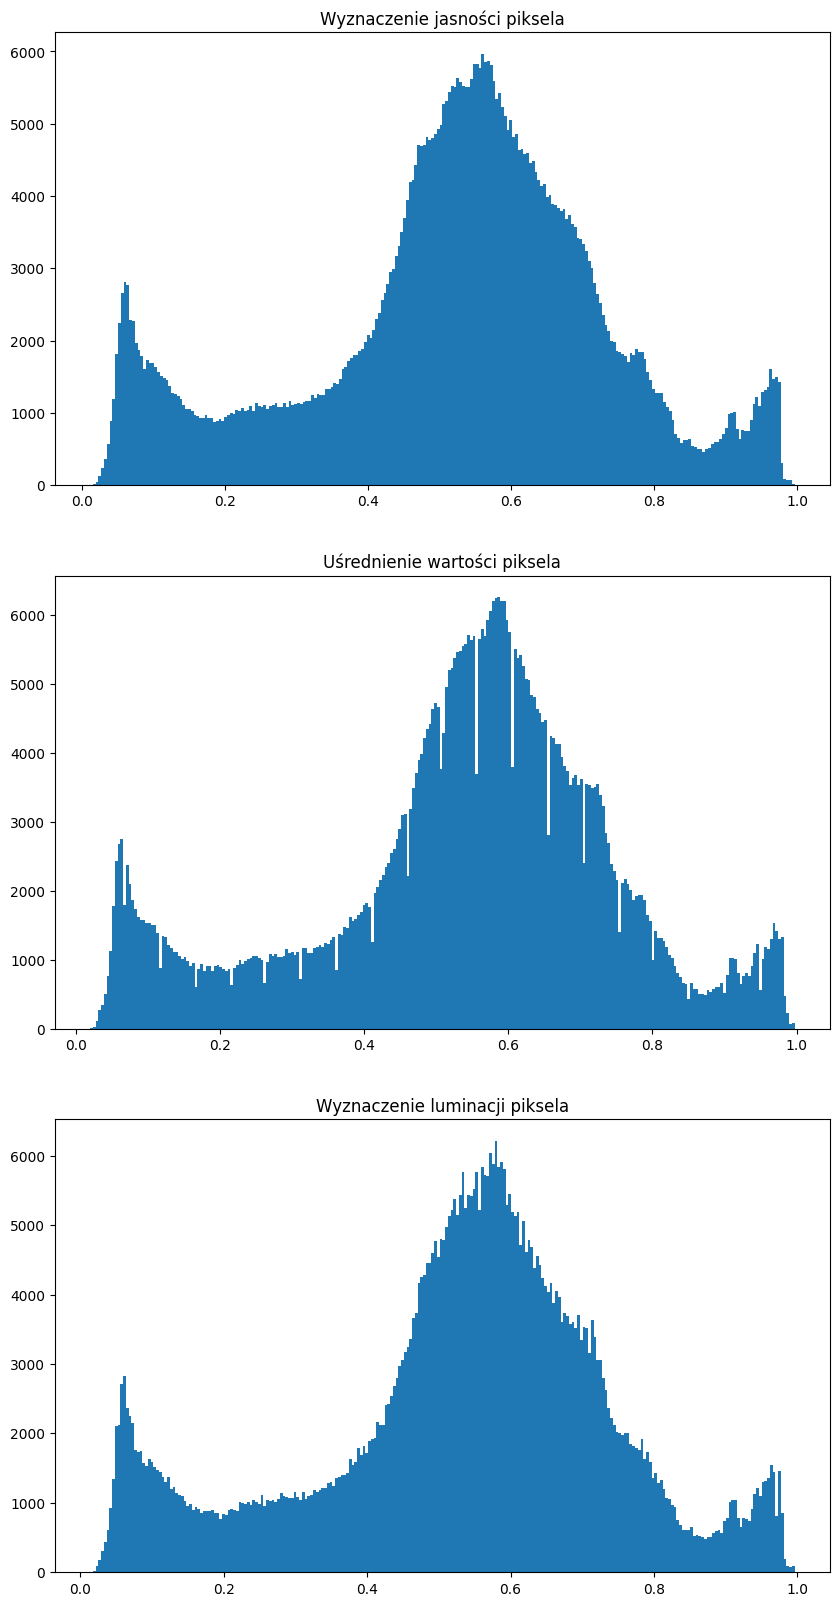

In [318]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

axs[0].set_title("Wyznaczenie jasności piksela")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

min = szarosc1.min()
max = szarosc1.max()

axs[0].hist(szarosc1.ravel(), bins=np.unique(szarosc1).size)
# axs[1].hist(szarosc2.ravel(), bins=np.unique(szarosc2).size)
# axs[2].hist(szarosc3.ravel(), bins=np.unique(szarosc3).size);

axs[1].hist(szarosc2.ravel(), bins=256)
axs[2].hist(szarosc3.ravel(), bins=256);

hist1, _ = np.histogram(szarosc1, 252)
hist2, _ = np.histogram(szarosc1, 256)
hist3, _ = np.histogram(szarosc1, 256)


zadanie 6

In [319]:
hist, bins = np.histogram(szarosc1.ravel(), bins=16)

for i in range(len(bins) - 1):
    print(f"{i+1}.\t{bins[i]:<19} - {bins[i + 1]}")


1.	0.0117647061124444  - 0.07328431308269501
2.	0.07328431308269501 - 0.1348039209842682
3.	0.1348039209842682  - 0.19632352888584137
4.	0.19632352888584137 - 0.25784313678741455
5.	0.25784313678741455 - 0.3193627595901489
6.	0.3193627595901489  - 0.3808823525905609
7.	0.3808823525905609  - 0.4424019753932953
8.	0.4424019753932953  - 0.5039215683937073
9.	0.5039215683937073  - 0.5654411911964417
10.	0.5654411911964417  - 0.626960813999176
11.	0.626960813999176   - 0.6884803771972656
12.	0.6884803771972656  - 0.75
13.	0.75                - 0.8115196228027344
14.	0.8115196228027344  - 0.8730392456054688
15.	0.8730392456054688  - 0.9345588088035583
16.	0.9345588088035583  - 0.9960784316062927


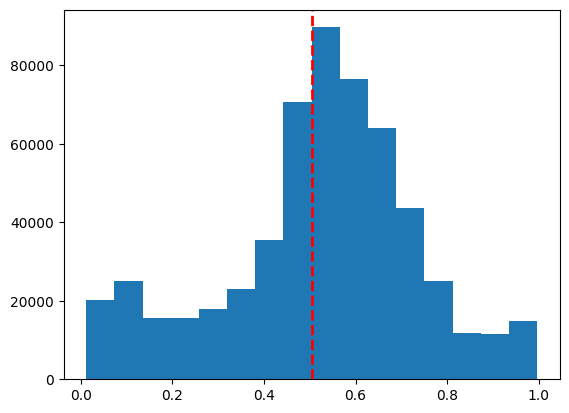

In [320]:
x = plt.hist(szarosc1.ravel(), bins=16)
plt.axvline(x[1].mean(), color='red', linestyle='dashed', linewidth=2);

zadanie 7

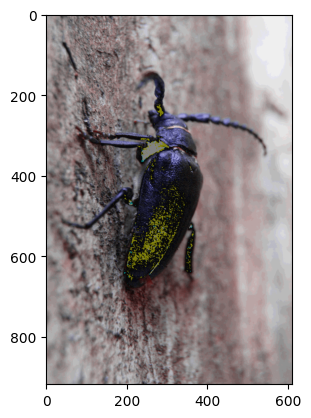

In [321]:
hist, bins = np.histogram(image.ravel(), bins=24)

rows, cols, x = image.shape
image_rc = image.copy()
       
dgt = np.digitize(image_rc, bins=bins[1:-1])

image_rc = (bins[dgt - 1] + bins[dgt]) / 2

plt.imshow(image_rc);

BINARYZACJA

zadanie 3, 4

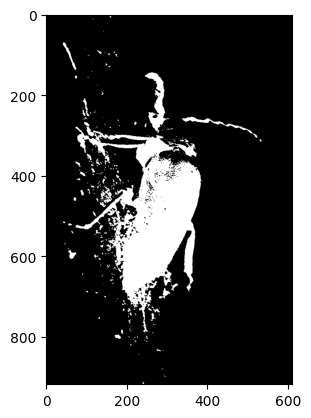

In [322]:
image_b = szarosc2.copy()

histogram = plt.hist(image_b.ravel(), bins=256, range=(0, 1))
histogram = histogram[1].reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(histogram)
threshold = kmeans.cluster_centers_[1]

image_b = np.where(image_b > threshold, 0, 1)
plt.set_cmap('gray');
plt.imshow(image_b);